In [1]:
# compare reported and predicted GDPpc growth series

import matplotlib.pyplot as plt
import xarray as xr

import tc_cost.util.constants as u_const

In [2]:
iso = "USA"

In [3]:
ds_growth = xr.open_dataset(u_const.BOOTSTRAP_DIR / "bootstrapped" / "gdppc_ch.nc").sel(ISO=iso)
ds_aff = xr.open_dataset(u_const.BOOTSTRAP_DIR / "bootstrapped" / "affected.nc").sel(ISO=iso)
ds_nb = ds_aff.sel(elt=["original"])
ds_nb['gdppc_ch'] = ds_growth['gdppc_ch']
ds_nb = ds_nb.squeeze()

In [4]:
ds_coeffs = xr.open_dataset(u_const.BOOTSTRAP_DIR / "estimates" / f"coeffs_9_ols_temp.nc").sel(ISO=iso)
ds_nb['predicted'] = ds_coeffs.assign_coords(year=1980 + ds_coeffs.year)["predicted"]

/home/tovogt/.local/share/miniconda3/envs/tc_cost/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1577: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


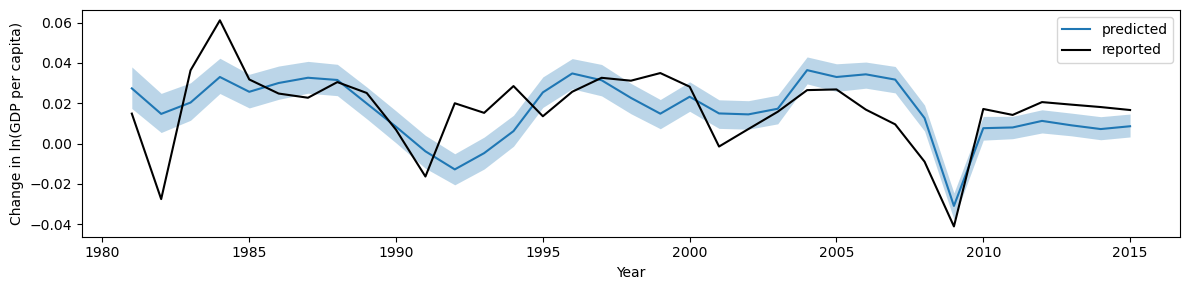

In [5]:
fig = plt.figure(figsize=(12, 3))
ax = fig.gca()
ax.plot(ds_nb["year"], ds_nb["predicted"].median(dim="elt"), color="tab:blue", label="predicted")
ax.fill_between(
    ds_nb["year"],
    ds_nb["predicted"].quantile(q=0.025, dim="elt"),
    ds_nb["predicted"].quantile(q=0.975, dim="elt"),
    lw=0,
    color="tab:blue",
    alpha=0.3
)
ax.plot(ds_nb["year"], ds_nb["gdppc_ch"], label="reported", color="black")
ax.set_xlabel("Year")
ax.set_ylabel("Change in ln(GDP per capita)")
ax.legend()
fig.tight_layout()